In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car.csv')
df_clean = df.copy()

In [3]:
df_clean.head()

,Name,Price,Used For,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Waranty,Types
0,Hyundai | i20 Active S | TDi | 2015 | Hatchbac...,"रू. 24,75,000रू. 25,00,000",Private Use,Manual2WD,Brown,2015,14,1400,Petrol,42000,NaN,NaN
1,Excellent car on sale (Hyundai),"रू. 7,50,000",NaN,Auto2WD,Light blue,2005,11,1399,Petrol,87412,NaN,NaN
2,TATA 407 Container (Tata),"रू. 7,00,000",NaN,Manual - 2WD,White,2013,NaN,2956,Diesel,60000,NaN,NaN
3,4x4 swaraj Mazda (Mahindra),"रू. 6,00,000",NaN,Manual - 4WD,NaN,2017,NaN,NaN,Diesel,NaN,NaN,NaN
4,i20 Active good for used few time (Hyundai),रू. 375,NaN,Auto - 2WD,white,2019,17,1200,Petrol,2400,NaN,NaN


In [4]:
df_clean.columns

Index(['Name', 'Price', 'Used For', 'Transmisson', 'Colour', 'Make Year',
       'Mileage', 'Engine (CC)', 'Fuel', 'Kilometer Run', 'Waranty', 'Types'],
      dtype='object')

In [5]:
print(len(df))

848


### Describe Data

### Brand Name Drop

In [6]:
df_clean['Brand Name'] = 0
for i in range(len(df)):
    try:
        index = len(df_clean['Name'][i].split('('))
        df_clean['Brand Name'][i] = (df_clean['Name'][i].split('(')[index-1]).replace(')','')
    except:
        df_clean['Brand Name'][i] = None
        

In [7]:
df_clean

,Name,Price,Used For,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Waranty,Types,Brand Name
0,Hyundai | i20 Active S | TDi | 2015 | Hatchbac...,"रू. 24,75,000रू. 25,00,000",Private Use,Manual2WD,Brown,2015,14,1400,Petrol,42000,NaN,NaN,Hyundai
1,Excellent car on sale (Hyundai),"रू. 7,50,000",NaN,Auto2WD,Light blue,2005,11,1399,Petrol,87412,NaN,NaN,Hyundai
2,TATA 407 Container (Tata),"रू. 7,00,000",NaN,Manual - 2WD,White,2013,NaN,2956,Diesel,60000,NaN,NaN,Tata
3,4x4 swaraj Mazda (Mahindra),"रू. 6,00,000",NaN,Manual - 4WD,NaN,2017,NaN,NaN,Diesel,NaN,NaN,NaN,Mahindra
4,i20 Active good for used few time (Hyundai),रू. 375,NaN,Auto - 2WD,white,2019,17,1200,Petrol,2400,NaN,NaN,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,Hyundai grand i10 (Hyundai),"रू. 24,50,000",2 years,Manual - 2WD,silver,2020,2025,1200,Petrol,26500,NaN,NaN,Hyundai
844,Well maintained car. Everything is fine. Singl...,"रू. 19,25,000",6 years,Manual2WD,Navy blue,2015,15,1200,Petrol,60000,No,NaN,Hyundai
845,VW Polo 2014 Highline 1200 (Renault),"रू. 19,50,000",7,Manual2WD,Carbon Steel ( Dark Grey),2014,12 to 14,1200,Petrol,60000,NaN,NaN,Renault
846,Hyundai i10 magna 2014 (Hyundai),"रू. 17,50,000",NaN,Manual - 2WD,silver,2014,NaN,1200,Petrol,93000,NaN,NaN,Hyundai


In [8]:
value_count = {}
brand_names = sorted(df_clean['Brand Name'].unique())

for i in range(len(brand_names)):
    length = df_clean.groupby('Brand Name').size()[i]
    if length < 10:
        value_count[brand_names[i]] = length

In [9]:
rows_to_drop = list(value_count)


In [10]:
df_drop_brand_names = df_clean.copy()

In [11]:
for row in rows_to_drop:
    df_drop_brand_names.drop(df_drop_brand_names.index[df_drop_brand_names['Brand Name'] == row],axis=0,inplace = True)

In [12]:
df_drop_brand_names.groupby('Brand Name').size()

Brand Name
Chevrolet         11
Ford              43
Honda             16
Hyundai          208
Kia               44
Mahindra          66
Maruti Suzuki    186
Nissan            24
Other Brands      30
Renault           10
Tata              80
Toyota            50
Volkswagen        24
dtype: int64

In [13]:
len(df_drop_brand_names)

792

In [14]:
map_brand_name_list = sorted(df_drop_brand_names["Brand Name"].unique())

In [15]:
map_brand_name = {}
map_index = 0
for brand_name in map_brand_name_list:
    map_brand_name[brand_name] = map_index
    map_index += 1

In [16]:
map_brand_name

{'Chevrolet': 0,
 'Ford': 1,
 'Honda': 2,
 'Hyundai': 3,
 'Kia': 4,
 'Mahindra': 5,
 'Maruti Suzuki': 6,
 'Nissan': 7,
 'Other Brands': 8,
 'Renault': 9,
 'Tata': 10,
 'Toyota': 11,
 'Volkswagen': 12}

In [17]:
df_drop_brand_names["Brand Name"] = df_drop_brand_names["Brand Name"].map(map_brand_name)

In [18]:
df_drop_brand_names.head()

,Name,Price,Used For,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Waranty,Types,Brand Name
0,Hyundai | i20 Active S | TDi | 2015 | Hatchbac...,"रू. 24,75,000रू. 25,00,000",Private Use,Manual2WD,Brown,2015,14,1400,Petrol,42000,NaN,NaN,3
1,Excellent car on sale (Hyundai),"रू. 7,50,000",NaN,Auto2WD,Light blue,2005,11,1399,Petrol,87412,NaN,NaN,3
2,TATA 407 Container (Tata),"रू. 7,00,000",NaN,Manual - 2WD,White,2013,NaN,2956,Diesel,60000,NaN,NaN,10
3,4x4 swaraj Mazda (Mahindra),"रू. 6,00,000",NaN,Manual - 4WD,NaN,2017,NaN,NaN,Diesel,NaN,NaN,NaN,5
4,i20 Active good for used few time (Hyundai),रू. 375,NaN,Auto - 2WD,white,2019,17,1200,Petrol,2400,NaN,NaN,3


In [19]:
df_drop_brand_names = df_drop_brand_names.reset_index(drop = True)

In [20]:
df_drop_used_for = df_drop_brand_names.copy()

### Dropping Used for column

In [21]:
df_drop_used_for.drop('Used For',axis = 1,inplace = True)

In [22]:
df_drop_used_for.drop('Name',axis = 1, inplace = True)

### Checking for Types and Warranty

In [23]:
df_types_and_warranty = df_drop_used_for.copy()

In [24]:
df_types_and_warranty['Types'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Types, dtype: float64

In [25]:
df_types_and_warranty.drop('Types',axis = 1, inplace = True)

In [26]:
df_types_and_warranty['Waranty'].describe()

count     196
unique     64
top        No
freq       56
Name: Waranty, dtype: object

In [27]:
df_types_and_warranty.drop('Waranty',axis = 1, inplace = True)

In [28]:
df_types_and_warranty

,Price,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Brand Name
0,"रू. 24,75,000रू. 25,00,000",Manual2WD,Brown,2015,14,1400,Petrol,42000,3
1,"रू. 7,50,000",Auto2WD,Light blue,2005,11,1399,Petrol,87412,3
2,"रू. 7,00,000",Manual - 2WD,White,2013,NaN,2956,Diesel,60000,10
3,"रू. 6,00,000",Manual - 4WD,NaN,2017,NaN,NaN,Diesel,NaN,5
4,रू. 375,Auto - 2WD,white,2019,17,1200,Petrol,2400,3
...,...,...,...,...,...,...,...,...,...
787,"रू. 24,50,000",Manual - 2WD,silver,2020,2025,1200,Petrol,26500,3
788,"रू. 19,25,000",Manual2WD,Navy blue,2015,15,1200,Petrol,60000,3
789,"रू. 19,50,000",Manual2WD,Carbon Steel ( Dark Grey),2014,12 to 14,1200,Petrol,60000,9
790,"रू. 17,50,000",Manual - 2WD,silver,2014,NaN,1200,Petrol,93000,3


### Kilometer Run

In [29]:
df_kilometer_run = df_types_and_warranty.copy()

In [30]:
df_kilometer_run['Kilometer Run'].describe()

count       656
unique      237
top       50000
freq         20
Name: Kilometer Run, dtype: object

In [31]:
df_kilometer_run['Kilometer Run'].apply(lambda x: x.replace('km','') if type(x)== str else x)
df_kilometer_run['Kilometer Run'].apply(lambda x: x.replace('kms','') if type(x)== str else x)
df_kilometer_run['Kilometer Run'].apply(lambda x: x.replace('k',',000') if type(x)== str else x)

0      42000
1      87412
2      60000
3        NaN
4       2400
       ...  
787    26500
788    60000
789    60000
790    93000
791    60000
Name: Kilometer Run, Length: 792, dtype: object

In [32]:
list_index = list(df_kilometer_run['Kilometer Run'])

In [33]:
list_index.index('-')

553

In [34]:
df_kilometer_run.drop(df_kilometer_run[(df_kilometer_run['Kilometer Run'] == '-')].index,inplace=True)

In [35]:
df_kilometer_run = df_kilometer_run.reset_index(drop = True)

In [36]:
df_kilometer_run_temp = df_kilometer_run.copy()

In [37]:
df_kilometer_run_temp['Kilometer Run'].dtypes

dtype('O')

In [38]:
for i in range(len(df_kilometer_run_temp)):
     try:
          df_kilometer_run_temp['Kilometer Run'][i] = int(df_kilometer_run_temp['Kilometer Run'][i])
     except:
          df_kilometer_run_temp['Kilometer Run'][i] = df_kilometer_run_temp['Kilometer Run'][i]

In [39]:
df_kilometer_run_temp['Kilometer Run'].fillna(int(df_kilometer_run_temp['Kilometer Run'].median()),inplace = True )

In [40]:
from Details import detailed_details

In [41]:
for i in range(len(df_kilometer_run_temp)):
     df_kilometer_run_temp['Kilometer Run'][i] = int(df_kilometer_run_temp['Kilometer Run'][i])

In [42]:
# import re
# def used_clean(a):
#     a = str(a)
#     pattern = r'^[0-9]*\.?[0-9]'
#     temp = re.findall(pattern,str(a))
#     temp = int(temp[0])
#     return (temp)
# df['Kilometer Run'].dtype

### For Make Year
    


In [43]:
df_make_year = df_kilometer_run_temp.copy()

In [44]:
print(df_make_year['Make Year'].dtype)

object


In [45]:
df_make_year.groupby('Make Year').size()

Make Year
0                           2
1975                        2
1992                        1
1993                        1
1997                        2
1998                        4
1999                        2
2000                        5
2001                        7
2002                        7
2003                       11
2004                       10
2005                       12
2006                       16
2006 november               1
2007                       32
2008                       27
2009                       45
2010                       61
2011                       28
2012                       28
2013                       38
2014                       56
2015                       53
2015`                       1
2016                       72
2017                       72
2018                       58
2019                       34
202                         1
2020                       22
2021                       57
2021 last mdel              1


In [46]:
df_make_year["Make Year"].isna().sum()

0

In [47]:
import re
test = " ".join("2016 GGG")
print(test)
df_make_year["Make Year"][100]
test = re.sub(r'[^\w\s]','', str(test))
print(type(test))
print(test)
test = int("".join([str(i) for i in str.split(test) if i.isdigit()]))

print(test)


2 0 1 6   G G G
<class 'str'>
2 0 1 6   G G G
2016


In [48]:
# res = [int(i) for i in test_string.split() if i.isdigit()]
import re
for j in range(len(df_make_year)):
    #separate each character by space
    df_make_year['Make Year'][j] = " ".join(df_make_year['Make Year'][j])
    #remove special characters
    df_make_year['Make Year'][j] = re.sub(r'[^\w\s]','', str(df_make_year['Make Year'][j]))
    try:
        df_make_year['Make Year'][j] = int("".join([str(i) for i in str.split(df_make_year['Make Year'][j]) if i.isdigit()]))
    except:
        df_make_year['Make Year'][j] = int(df_make_year['Make Year'][j])
        pass

In [49]:
for i in range(len(df_make_year)):
     try:
          df_make_year['Make Year'][i] = int(df_make_year['Make Year'][i])
     except:
          df_make_year['Make Year'][i] = df_make_year['Make Year'][i]

In [50]:
# print(df_make_year['Make Year'].dtype)
# Converting to Nepali Date
for i in range(len(df_make_year)):
    if df_make_year['Make Year'][i] <= 2023:
        df_make_year['Make Year'][i] = df_make_year['Make Year'][i] + 56 
# print(df_make_year.groupby('Make Year').size())


In [51]:
index_to_drop = df_make_year[df_make_year['Make Year'] < 2000].index
df_make_year.drop(index_to_drop)

,Price,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Brand Name
0,"रू. 24,75,000रू. 25,00,000",Manual2WD,Brown,2071,14,1400,Petrol,42000,3
1,"रू. 7,50,000",Auto2WD,Light blue,2061,11,1399,Petrol,87412,3
2,"रू. 7,00,000",Manual - 2WD,White,2069,NaN,2956,Diesel,60000,10
3,"रू. 6,00,000",Manual - 4WD,NaN,2073,NaN,NaN,Diesel,49000,5
4,रू. 375,Auto - 2WD,white,2075,17,1200,Petrol,2400,3
...,...,...,...,...,...,...,...,...,...
786,"रू. 24,50,000",Manual - 2WD,silver,2076,2025,1200,Petrol,26500,3
787,"रू. 19,25,000",Manual2WD,Navy blue,2071,15,1200,Petrol,60000,3
788,"रू. 19,50,000",Manual2WD,Carbon Steel ( Dark Grey),2070,12 to 14,1200,Petrol,60000,9
789,"रू. 17,50,000",Manual - 2WD,silver,2070,NaN,1200,Petrol,93000,3


In [52]:
df_make_year = df_make_year.reset_index(drop = True)

### Engine

In [53]:
df_engine = df_make_year.copy()

In [54]:
len(df_engine)

791

In [55]:
df_engine.groupby('Engine (CC)').size()

Engine (CC)
0              1
1..2           1
1.6 petrol     1
1000          30
10000          1
              ..
993            1
995            2
996            2
998            6
999            7
Length: 129, dtype: int64

In [56]:
import re
test = " ".join("gg2016 GGG")
print(test)
df_make_year["Make Year"][100]
test = re.sub(r'[^\w\s]','', str(test))
print(type(test))
print(test)
test = int("".join([str(i) for i in str.split(test) if i.isdigit()]))

print(test)

g g 2 0 1 6   G G G
<class 'str'>
g g 2 0 1 6   G G G
2016


In [57]:
df_engine["Engine (CC)"].isna().sum() #100 datas
df_engine.dropna(subset = ["Engine (CC)"],inplace = True)
df_engine = df_engine.reset_index(drop =True)


In [58]:
# res = [int(i) for i in test_string.split() if i.isdigit()]
import re
for j in range(len(df_engine)):
    #separate each character by space
    df_engine['Engine (CC)'][j] = " ".join(df_engine['Engine (CC)'][j])
    #remove special characters
    df_engine['Engine (CC)'][j] = re.sub(r'[^\w\s]','', str(df_engine['Engine (CC)'][j]))
    try:
        df_engine['Engine (CC)'][j] = int("".join([str(i) for i in str.split(df_engine['Engine (CC)'][j]) if i.isdigit()]))
    except:
        df_engine['Engine (CC)'][j] = int(df_engine['Engine (CC)'][j])
        pass

In [59]:
df_engine['Engine (CC)'].median()

1200.0

In [60]:
df_engine['Engine (CC)']

0      1400
1      1399
2      2956
3      1200
4      2956
       ... 
686    1200
687    1200
688    1200
689    1200
690    2200
Name: Engine (CC), Length: 691, dtype: object

In [61]:
df_engine.head()

,Price,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Brand Name
0,"रू. 24,75,000रू. 25,00,000",Manual2WD,Brown,2071,14,1400,Petrol,42000,3
1,"रू. 7,50,000",Auto2WD,Light blue,2061,11,1399,Petrol,87412,3
2,"रू. 7,00,000",Manual - 2WD,White,2069,NaN,2956,Diesel,60000,10
3,रू. 375,Auto - 2WD,white,2075,17,1200,Petrol,2400,3
4,"रू. 14,00,000",Manual2WD,Artic Silver,2070,12,2956,Diesel,49000,10


In [62]:
(df_engine["Engine (CC)"].unique())

array([1400, 1399, 2956, 1200, 889, 800, 1100, 2500, 2100, 2499, 1197,
       1582, 1193, 28, 1086, 1500, 1299, 2000, 999, 1000, 1600, 3783, 250,
       30, 1084, 1300, 1248, 1948, 2882, 1599, 2900, 2800, 2523, 2179,
       3500, 2200, 995, 2400, 1198, 996, 1405, 1196, 15000, 3000, 2169,
       1499, 2967, 1591, 1596, 702, 1298, 2700, 1096, 796, 700, 1186, 814,
       5223, 100, 1991, 1497, 1656, 998, 1998, 2950, 2999, 3200, 2600,
       1075, 1047, 110, 1997, 1462, 1699, 1061, 1496, 1199, 3700, 1350,
       1498, 600, 1598, 5883, 993, 624, 1191, 1995, 4461, 1984, 2494,
       2755, 15, 10000, 2199, 1992, 2362, 1490, 1900, 1396, 1087, 1049,
       1250, 2609, 0, 901, 909, 4000, 1387, 1068, 1586, 1990, 16, 87, 12,
       1098, 900, 1468, 4], dtype=object)

In [63]:
df_engine.drop(df_engine.loc[df_engine['Engine (CC)'] < 500].index, inplace=True)
df_engine.reset_index(drop = True,inplace = True)

In [64]:
(df_engine["Engine (CC)"].unique())


array([1400, 1399, 2956, 1200, 889, 800, 1100, 2500, 2100, 2499, 1197,
       1582, 1193, 1086, 1500, 1299, 2000, 999, 1000, 1600, 3783, 1084,
       1300, 1248, 1948, 2882, 1599, 2900, 2800, 2523, 2179, 3500, 2200,
       995, 2400, 1198, 996, 1405, 1196, 15000, 3000, 2169, 1499, 2967,
       1591, 1596, 702, 1298, 2700, 1096, 796, 700, 1186, 814, 5223, 1991,
       1497, 1656, 998, 1998, 2950, 2999, 3200, 2600, 1075, 1047, 1997,
       1462, 1699, 1061, 1496, 1199, 3700, 1350, 1498, 600, 1598, 5883,
       993, 624, 1191, 1995, 4461, 1984, 2494, 2755, 10000, 2199, 1992,
       2362, 1490, 1900, 1396, 1087, 1049, 1250, 2609, 901, 909, 4000,
       1387, 1068, 1586, 1990, 1098, 900, 1468], dtype=object)

### Mileage

In [65]:
df_mileage = df_engine.copy()

In [66]:
df_mileage['Mileage'].isna().sum()

276

In [67]:
df_mileage['Mileage'].unique()

array(['14', '11', nan, '17', '12', '15', '17/18 km', '14+', '18', '13',
       '21.4', '10', '18/20', '16', '5', '15 km/l', '13-15', '10 to 15',
       '7', '18 kmpl', '20-21', '20', '13-Dec', '19', '22', '16-17',
       '12 to 14', '69000', '50', 'Good', '16-18', '6, 7', '14/15',
       '50000', '15-Dec', '13-18', '12-Oct', '17.5', '14-Dec', '15 KMPL',
       'N/a', '10 to 12', '13 plus', '14-15', '40', '17/18',
       '15.3 (As shown on the average counter display)', '12Km/Pl',
       '19-20', '12-Aug', '29.87', '8', '16.5', '14 km', '13-Oct', '2025',
       '10-Aug', '21', '17-19km/l', '15km/ltr', '10-Sep',
       '18 Km per liter', '23', '15 above', '27km/ltr', '27.97',
       '16 in city', '20kmpl', '15000', '+12km', '12 km/he'], dtype=object)

In [68]:
df_mileage.drop(df_mileage.loc[df_mileage['Mileage']=='Good'].index, inplace=True)
df_mileage.drop(df_mileage.loc[df_mileage['Mileage']=='N/a'].index, inplace=True)
df_mileage.reset_index(drop = True,inplace = True)

In [69]:
df_mileage['Mileage'].unique()

array(['14', '11', nan, '17', '12', '15', '17/18 km', '14+', '18', '13',
       '21.4', '10', '18/20', '16', '5', '15 km/l', '13-15', '10 to 15',
       '7', '18 kmpl', '20-21', '20', '13-Dec', '19', '22', '16-17',
       '12 to 14', '69000', '50', '16-18', '6, 7', '14/15', '50000',
       '15-Dec', '13-18', '12-Oct', '17.5', '14-Dec', '15 KMPL',
       '10 to 12', '13 plus', '14-15', '40', '17/18',
       '15.3 (As shown on the average counter display)', '12Km/Pl',
       '19-20', '12-Aug', '29.87', '8', '16.5', '14 km', '13-Oct', '2025',
       '10-Aug', '21', '17-19km/l', '15km/ltr', '10-Sep',
       '18 Km per liter', '23', '15 above', '27km/ltr', '27.97',
       '16 in city', '20kmpl', '15000', '+12km', '12 km/he'], dtype=object)

In [70]:
import re
import math
for j in range(len(df_mileage)):
    try:
        if math.isnan(df_mileage['Mileage'][j]):
            continue
    except:
        pass
    #separate each character by space
    df_mileage['Mileage'][j] = " ".join(str(df_mileage['Mileage'][j]))
    #remove special characters
    df_mileage['Mileage'][j] = re.sub(r'[^\w\s]','', str(df_mileage['Mileage'][j]))
    try:
        df_mileage['Mileage'][j] = int("".join([str(i) for i in str.split(df_mileage['Mileage'][j]) if i.isdigit()])[0:2])
    except:
        # df_mileage['Mileage'][j] = int(df_mileage['Mileage'][j])
        pass
    
    try:
        df_mileage['Mileage'][j] = int(df_mileage['Mileage'][j])
    except:
        df_mileage['Mileage'][j] = df_mileage['Mileage'][j]

In [71]:
df_mileage["Mileage"].value_counts()

14    65
15    65
12    60
16    37
13    36
18    35
10    27
17    23
20    15
11     9
19     6
8      4
23     3
50     2
27     2
5      2
21     2
69     1
22     1
67     1
40     1
29     1
7      1
Name: Mileage, dtype: int64

In [72]:
df_mileage.drop(df_mileage.loc[df_mileage['Mileage'] > 30].index, inplace=True)
df_mileage.reset_index(drop = True,inplace = True)

In [73]:
df_mileage["Mileage"].value_counts()

14    65
15    65
12    60
16    37
13    36
18    35
10    27
17    23
20    15
11     9
19     6
8      4
23     3
21     2
5      2
27     2
7      1
22     1
29     1
Name: Mileage, dtype: int64

In [74]:
df_mileage[df_mileage['Engine (CC)']==1191]['Mileage'].median()

12.0

In [75]:
for i in range(len(df_mileage)):
    df_mileage['Mileage'].fillna(df_mileage[df_mileage['Engine (CC)']==df_mileage["Engine (CC)"][i]]['Mileage'].median(),inplace = True)

In [76]:
df_mileage["Mileage"].isna().sum()
df_mileage["Mileage"].value_counts()

14.0    341
15.0     65
12.0     60
16.0     37
13.0     36
18.0     35
10.0     27
17.0     23
20.0     15
11.0      9
19.0      6
8.0       4
23.0      3
21.0      2
5.0       2
27.0      2
7.0       1
22.0      1
29.0      1
Name: Mileage, dtype: int64

In [77]:
df_mileage["Mileage"].mode()

0    14.0
Name: Mileage, dtype: float64

In [78]:
df_mileage.head()

,Price,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Brand Name
0,"रू. 24,75,000रू. 25,00,000",Manual2WD,Brown,2071,14.0,1400,Petrol,42000,3
1,"रू. 7,50,000",Auto2WD,Light blue,2061,11.0,1399,Petrol,87412,3
2,"रू. 7,00,000",Manual - 2WD,White,2069,14.0,2956,Diesel,60000,10
3,रू. 375,Auto - 2WD,white,2075,17.0,1200,Petrol,2400,3
4,"रू. 14,00,000",Manual2WD,Artic Silver,2070,12.0,2956,Diesel,49000,10


### Fuel

In [79]:
df_fuel = df_mileage.copy()

In [80]:
df_fuel["Fuel"].value_counts()

Petrol      499
Diesel      166
Hybrid        4
Electric      1
Name: Fuel, dtype: int64

In [81]:
map_fuel = { "Diesel" : 0 , "Electric" : 1 , "Hybrid" : 2 , "Petrol" : 3}
df_fuel["Fuel"]=df_fuel["Fuel"].map(map_fuel)

In [82]:
df_fuel.head()

,Price,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Brand Name
0,"रू. 24,75,000रू. 25,00,000",Manual2WD,Brown,2071,14.0,1400,3,42000,3
1,"रू. 7,50,000",Auto2WD,Light blue,2061,11.0,1399,3,87412,3
2,"रू. 7,00,000",Manual - 2WD,White,2069,14.0,2956,0,60000,10
3,रू. 375,Auto - 2WD,white,2075,17.0,1200,3,2400,3
4,"रू. 14,00,000",Manual2WD,Artic Silver,2070,12.0,2956,0,49000,10


### Transmisson

In [83]:
df_transmission = df_fuel.copy()

In [84]:
df_transmission["Transmisson"].value_counts()

Manual - 2WD      242
Manual2WD         185
Auto2WD            53
Manual - 4WD       49
Auto - 2WD         45
Manual4WD          33
Power Steering     21
Auto4WD            17
Auto - 4WD         16
PowerSteering       9
Name: Transmisson, dtype: int64

In [85]:
import re
def cleantext(text):
    cleanString = re.sub('\W+','', text )
    return cleanString

In [86]:
df_transmission["Transmisson"] = df_transmission["Transmisson"].apply(str.lower)
df_transmission["Transmisson"] = df_transmission["Transmisson"].apply(cleantext)

In [87]:
df_transmission["Transmisson"].value_counts()

manual2wd        427
auto2wd           98
manual4wd         82
auto4wd           33
powersteering     30
Name: Transmisson, dtype: int64

In [88]:
map_transmission = {"auto2wd" : 0 , "auto4wd" : 1 , "manual2wd" : 2 , "manual4wd" : 3 , "powersteering" : 4}
df_transmission["Transmisson"] = df_transmission["Transmisson"].map(map_transmission)

In [89]:
df_transmission.head()

,Price,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Brand Name
0,"रू. 24,75,000रू. 25,00,000",2,Brown,2071,14.0,1400,3,42000,3
1,"रू. 7,50,000",0,Light blue,2061,11.0,1399,3,87412,3
2,"रू. 7,00,000",2,White,2069,14.0,2956,0,60000,10
3,रू. 375,0,white,2075,17.0,1200,3,2400,3
4,"रू. 14,00,000",2,Artic Silver,2070,12.0,2956,0,49000,10


### Color

In [90]:
df_color = df_transmission.copy()

In [91]:
df_color["Colour"].nunique()

162

In [92]:
df_color.drop(columns = "Colour",inplace = True)

In [93]:
df_color.head()

,Price,Transmisson,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Brand Name
0,"रू. 24,75,000रू. 25,00,000",2,2071,14.0,1400,3,42000,3
1,"रू. 7,50,000",0,2061,11.0,1399,3,87412,3
2,"रू. 7,00,000",2,2069,14.0,2956,0,60000,10
3,रू. 375,0,2075,17.0,1200,3,2400,3
4,"रू. 14,00,000",2,2070,12.0,2956,0,49000,10


### Price

In [127]:

df_price = df_color.copy()

In [128]:
df_price["Price"].nunique()

286

In [129]:
test = "रू. 24,75,000रू. 25,00,000".split("रू. ")[1]
test

'24,75,000'

In [130]:

import re
import math
for j in range(len(df_price)):
    try:
        if math.isnan(df_price['Price'][j]):
            continue
    except:
        pass
    #separate each character by space
    df_price["Price"][j] = df_price["Price"][j].split("रू.")[1]
    df_price['Price'][j] = " ".join(str(df_price['Price'][j]))
    #remove special characters
    df_price['Price'][j] = re.sub(r'[^\w\s]','', str(df_price['Price'][j]))
    try:
        df_price['Price'][j] = int("".join([str(i) for i in str.split(df_price['Price'][j]) if i.isdigit()]))
    except:
        # df_price['Price'][j] = int(df_price['Price'][j])
        pass
    
    try:
        df_price['Price'][j] = int(df_price['Price'][j])
    except:
        df_price['Price'][j] = df_price['Price'][j]
    if df_price['Price'][j] < 1000:
        df_price = df_price.drop(df_price.index[j])

In [131]:
df_price

,Price,Transmisson,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Brand Name
0,2475000,2,2071,14.0,1400,3,42000,3
1,750000,0,2061,11.0,1399,3,87412,3
2,700000,2,2069,14.0,2956,0,60000,10
4,1400000,2,2070,12.0,2956,0,49000,10
5,700000,0,2075,15.0,889,3,80000,10
...,...,...,...,...,...,...,...,...
665,2450000,2,2076,20.0,1200,3,26500,3
666,1925000,2,2071,15.0,1200,3,60000,3
667,1950000,2,2070,12.0,1200,3,60000,9
668,1750000,2,2070,14.0,1200,3,93000,3


In [132]:
df_price["Price"].nunique()

278

<AxesSubplot:>

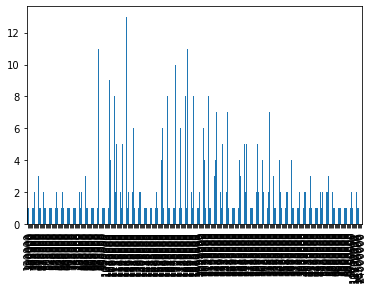

In [133]:
df_price["Price"].value_counts().sort_index(ascending=True).plot(kind="bar")

In [134]:
df_final = df_price.copy()

In [135]:
df_final["Price"] = df_final["Price"].astype(int)
df_final["Make Year"] = df_final["Make Year"].astype(int)
df_final["Engine (CC)"] = df_final["Engine (CC)"].astype(int)

### Data Visualization

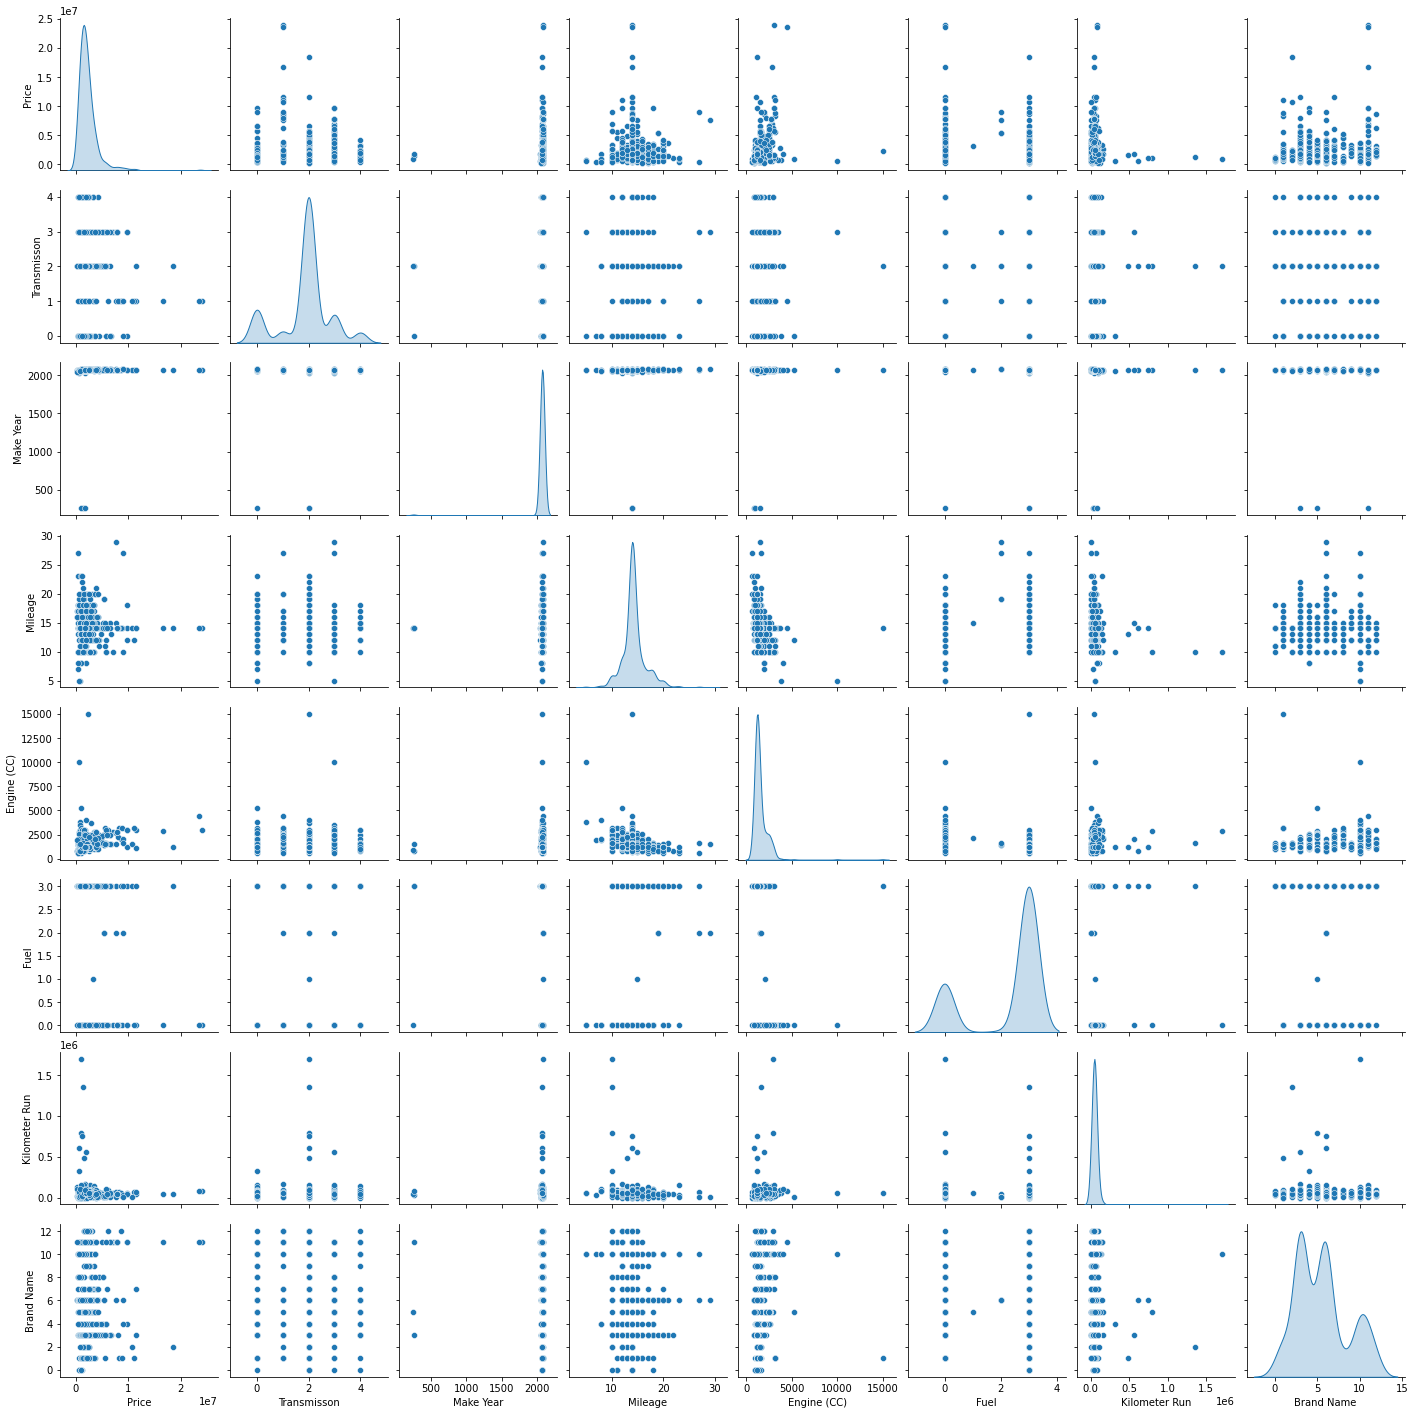

In [159]:
sns.pairplot(data = df_final, diag_kind='kde')


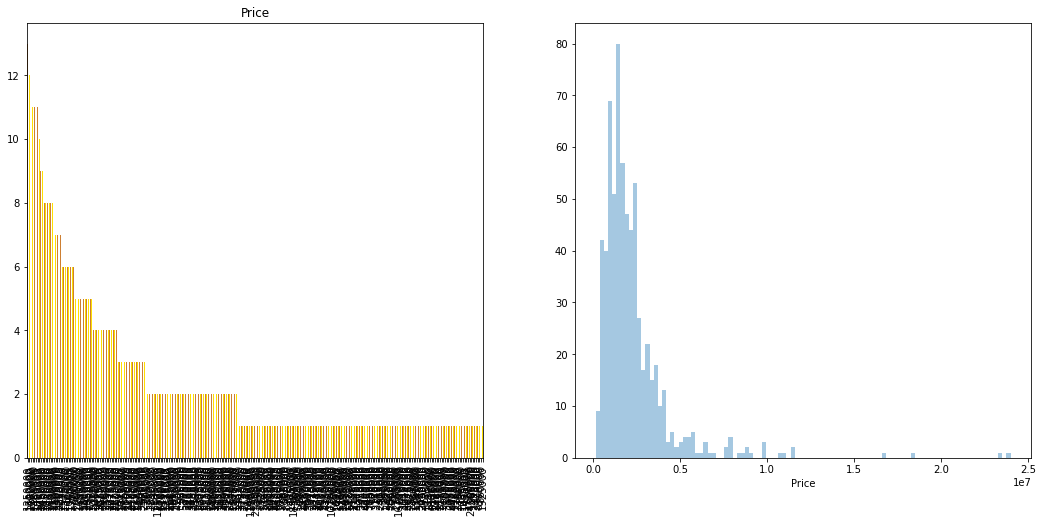

<Figure size 720x360 with 0 Axes>

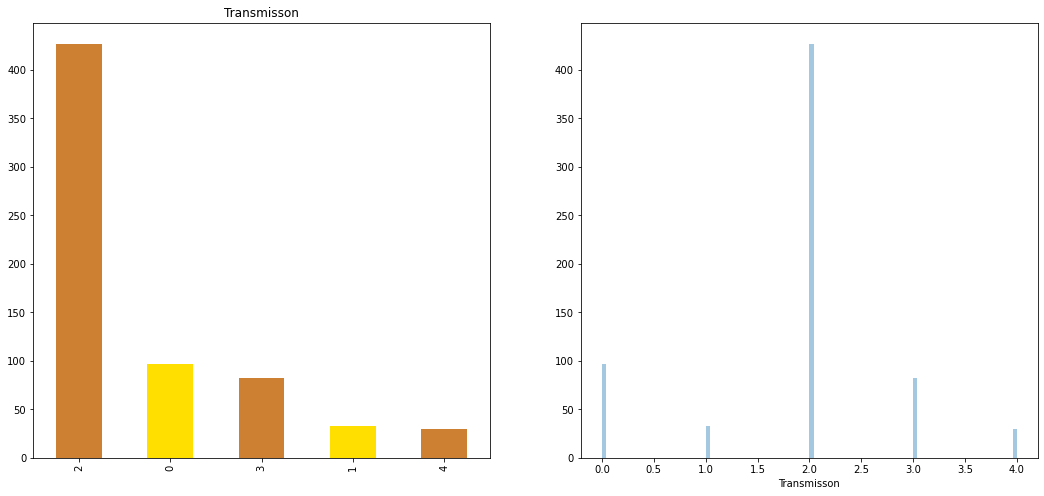

<Figure size 720x360 with 0 Axes>

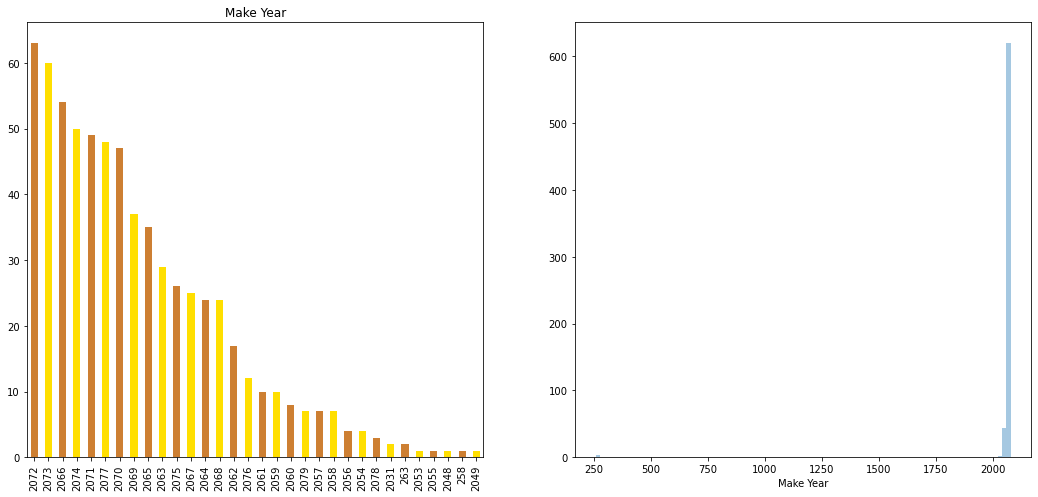

<Figure size 720x360 with 0 Axes>

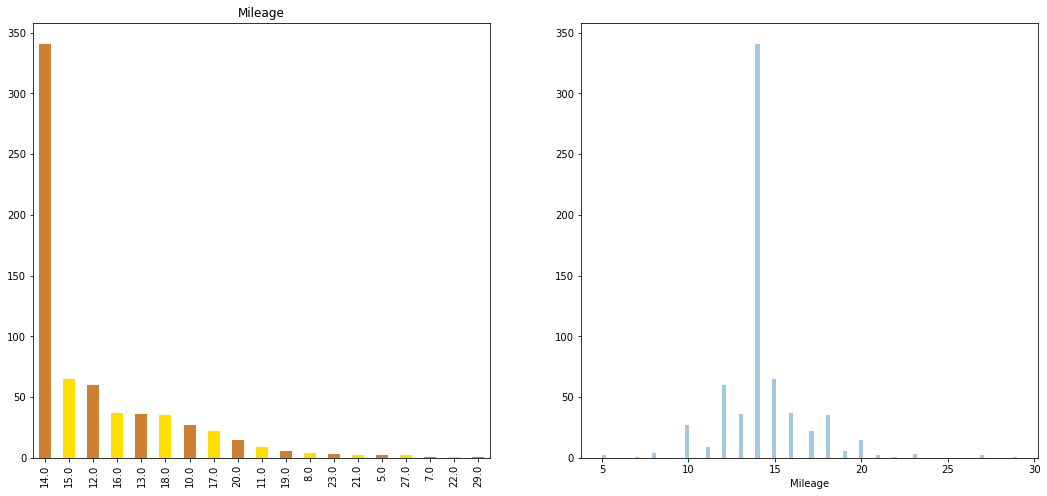

<Figure size 720x360 with 0 Axes>

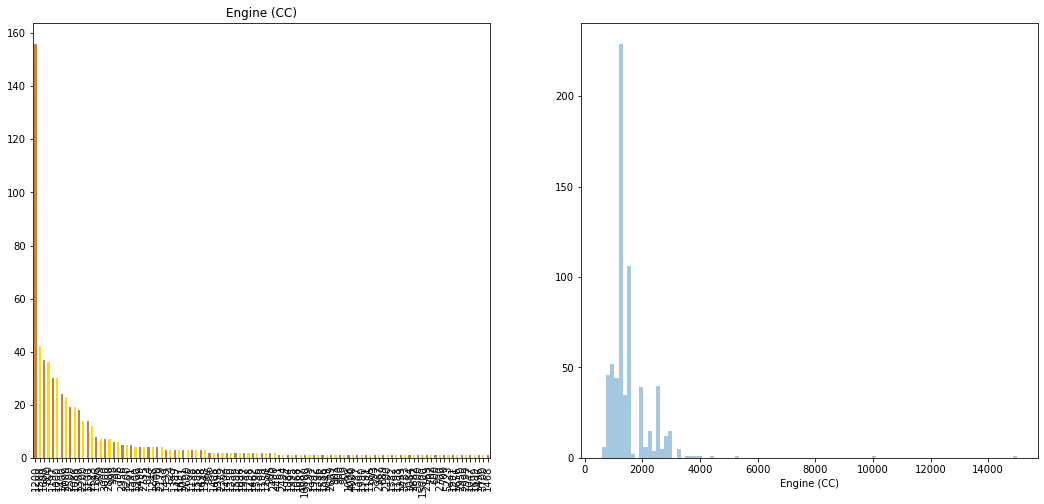

<Figure size 720x360 with 0 Axes>

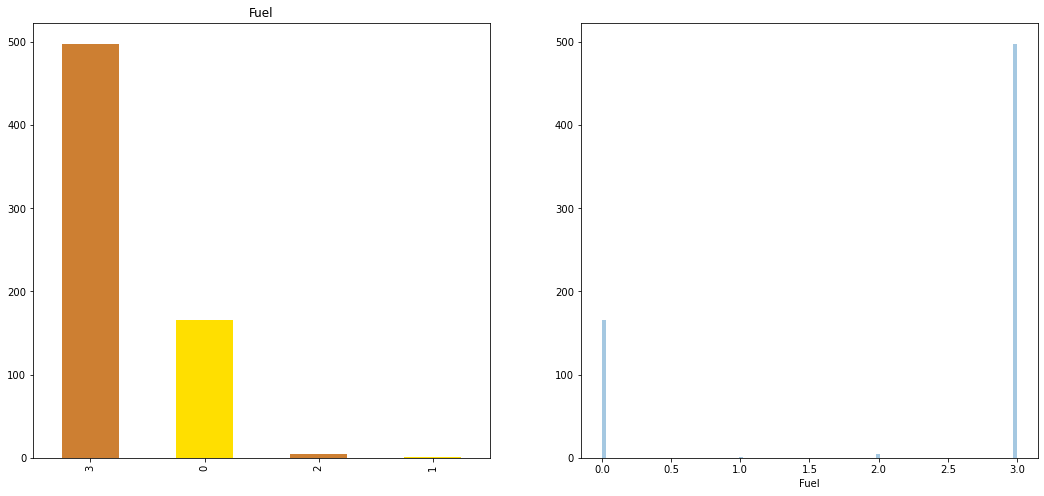

<Figure size 720x360 with 0 Axes>

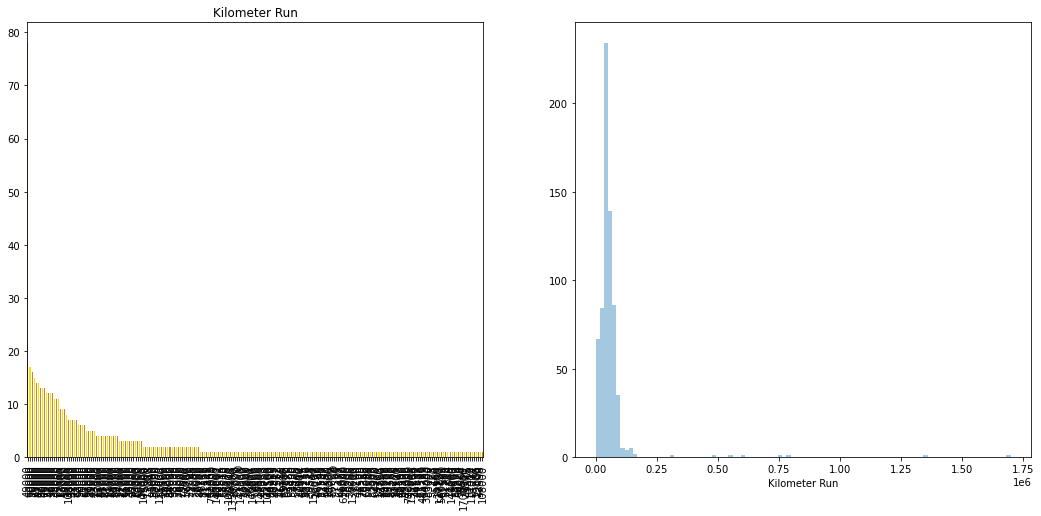

<Figure size 720x360 with 0 Axes>

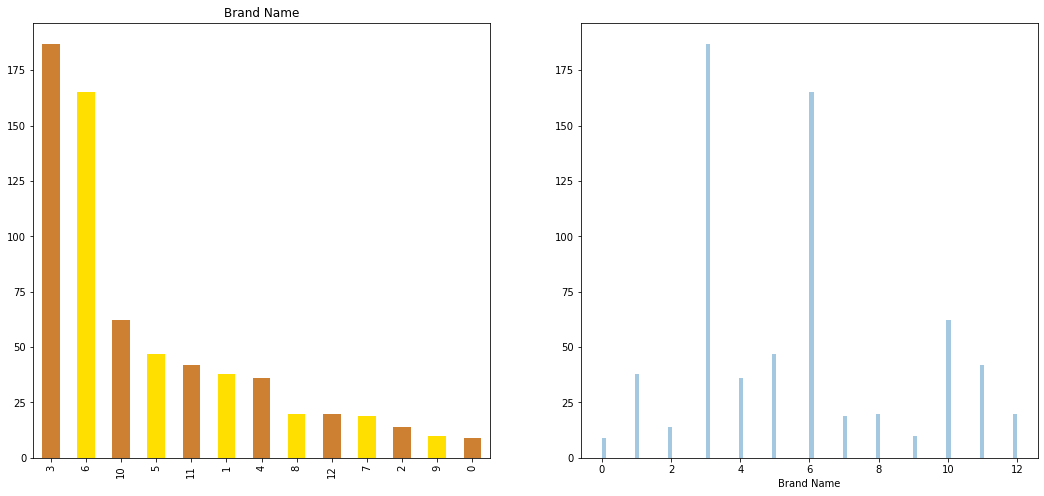

<Figure size 720x360 with 0 Axes>

In [163]:
for i in df_final.columns:
   f, ax = plt.subplots(1, 2, figsize=(18, 8))
   df_final[i].value_counts().plot.bar(
    color=['#CD7F32', '#FFDF00'], ax=ax[0])
   ax[0].set_title(str(i))
   plt.figure(figsize=(10,5))
   sns.distplot(df_final[i],bins=100,kde=False,ax=ax[1])
   # sns.countplot(i, hue=i, data=df_final,ax=ax[2])
   # ax[2].set_title(str(i))
   plt.show()

### Linear Regression

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [138]:
df_final.corr()

,Price,Transmisson,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Brand Name
Price,1.000000,-0.005629,0.044427,0.009300,0.255313,-0.159607,-0.079356,0.073069
Transmisson,-0.005629,1.000000,0.037456,-0.040299,0.100591,-0.124304,0.028287,-0.035365
Make Year,0.044427,0.037456,1.000000,0.017283,0.036906,0.012100,-0.000471,-0.019381
Mileage,0.009300,-0.040299,0.017283,1.000000,-0.293320,0.145167,-0.163706,-0.007403
Engine (CC),0.255313,0.100591,0.036906,-0.293320,1.000000,-0.484542,0.089260,0.188084
Fuel,-0.159607,-0.124304,0.012100,0.145167,-0.484542,1.000000,-0.104512,-0.246045
Kilometer Run,-0.079356,0.028287,-0.000471,-0.163706,0.089260,-0.104512,1.000000,0.017579
Brand Name,0.073069,-0.035365,-0.019381,-0.007403,0.188084,-0.246045,0.017579,1.000000


In [139]:
# X = df_final.loc[:,""].values
# y = df_final.loc[:,"Price"].values

X = df_final.drop(['Price'],axis = 1)
y = df_final["Price"]

In [140]:
# print("***** Independent Values(x) *****")
# print(X)
print("***** Independent Value Shape *****")
print(X.shape)
# print("***** Dependent Values(y) *****")
# print(y)
print("***** Dependent Value Shape *****")
print(y.shape)

***** Independent Value Shape *****
(669, 7)
***** Dependent Value Shape *****
(669,)


In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [142]:
corr = X_train.corrwith(y_train)
top_four = np.abs(corr).sort_values(ascending=False).iloc[0:4].index

In [143]:
top_four

Index(['Engine (CC)', 'Fuel', 'Brand Name', 'Kilometer Run'], dtype='object')

In [144]:
linear_reg = LinearRegression()

In [145]:
linear_reg.fit(X_train[top_four],y_train)

LinearRegression()

In [146]:
y_pred = linear_reg.predict(X_test[top_four])

In [147]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 1009340.52
Mean squared error = 1937351429045.72
Median absolute error = 714650.43
Explain variance score = -0.01
R2 score = -0.04


Engine (CC)


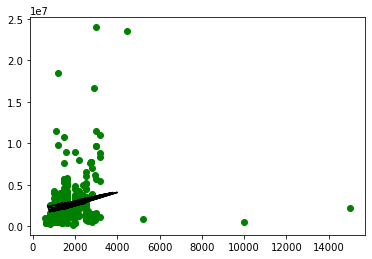

Fuel


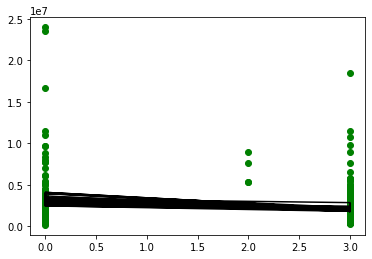

Brand Name


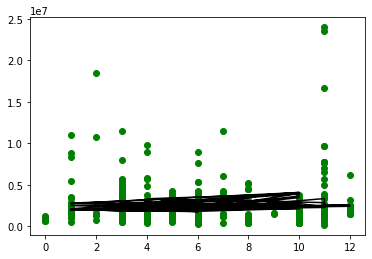

Kilometer Run


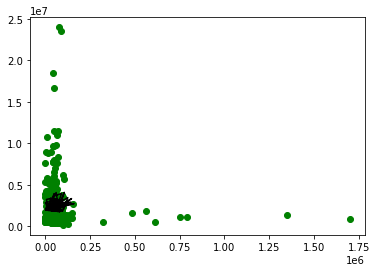

In [148]:
for index in top_four:
    print(index)
    plt.scatter(X_train[index], y_train,color='g') 
    plt.plot(X_test[index], y_pred,color='k') 
    plt.show()

### SVC

In [149]:
from sklearn.svm import SVR

In [150]:
svr = SVR()

In [151]:
svr.fit(X_train[top_four],y_train)

SVR()

In [152]:
y_pred = svr.predict(X_test[top_four])

In [153]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 907147.68
Mean squared error = 1978128313791.92
Median absolute error = 612498.34
Explain variance score = 0.0
R2 score = -0.06
